# Cereal Data

In this project, I will look at data on the nutritional content of breakfast cereals (source: https://www.kaggle.com/crawford/80-cereals) to see how different nutritional variables affect an overall nutritional rating. In this notebook, I will view the data and prepare it for modeling. 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Import data
data = pd.read_csv('cereal.csv')

In [3]:
# The data consists of cereal names, nutritional content, and an overall nutritional rating for each

# 'mfr' is the cereal manufacturer, with:
# A = American Home Food Products
# G = General Mills
# K = Kelloggs
# N = Nabisco
# P = Post
# Q = Quaker Oats
# R = Ralston Purina

# 'type' is type, with
# C = cold
# H = hot

# View first five rows of data
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# Size of data
data.shape

(77, 16)

## Data Preprocessing

There are a few categorical variables which will be encoded below. There is a value of -1 for 'potass' in the 'Almond Delight' row, so we can look for other negative values, which are invalid values here.

In [5]:
# Print unique values from the 'potass' column
print("Unique values in 'potass' column:", data['potass'].unique())

Unique values in 'potass' column: [280 135 320 330  -1  70  30 100 125 190  35 105  45  55  25  20  65 160
 120  80 200  40  85  90  60  95 170 130 260  15  50 110 240 140 230 115]


In [6]:
# Check for values of -1 in whole dataset
data[data.eq(-1).any(1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [7]:
# Drop the rows containing -1
data_dropped = data.drop(data.index[[4,20,57]])

In [8]:
# View to first five rows to verify that index 4 has been dropped
data_dropped.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [9]:
# Set target as y, rest of data as X
y = data_dropped.rating
X = data_dropped.drop(['rating'], axis=1)

In [10]:
# View first five rows of X
X.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75


In [11]:
# View first five rows of y
y.head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
5    29.509541
Name: rating, dtype: float64

In [12]:
# Split data into training and test sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Categorical Variables

Before encoding the categorical variables, we need to see which variables they are, and how many entries appear in each.

In [13]:
# Get list of categorical variables
c = (X_train_full.dtypes == 'object')
cat_columns = list(c[c].index)

print("Categorical variables:")
print(cat_columns)

Categorical variables:
['name', 'mfr', 'type']


In [14]:
# Get number of unique entries in each column which contains categorical data
cat_nunique = list(map(lambda col: X_train_full[col].nunique(), cat_columns))

# Define dictionary of categorical data
d = dict(zip(cat_columns, cat_nunique))

# Print number of unique entries in each categorical column, starting with lowest values
sorted(d.items(), key=lambda x: x[1])

[('type', 2), ('mfr', 7), ('name', 59)]

The pandas method get_dummies is a possibility to encode the categorical data, but since there is only one 'A' entry in 'mfr', get_dummies will lead to a NaN in either train or test data. Therefore, in this case we can use sklearn's OneHotEncoder instead.

We want to include 'type' and 'mfr', but not 'name', as there are so many entries, and as it is the cereal name, it won't be helpful in our analysis.

In [15]:
# Select categorical columns with a threshold number of categories, in this case 10, so 'type' and 'mfr'
# will be included but 'name' will not be
low_nunique_cat_cols = [colname for colname in X_train_full.columns if X_train_full[colname].nunique() < 10 and 
                        X_train_full[colname].dtype == "object"]

# Apply one-hot encoder to each column with categorical data
# handle_unknown='ignore' ignores unknown variables in test data
# sparse=False returns numpy array rather than sparse matrix
One_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
One_hot_train_cols = pd.DataFrame(One_hot_encoder.fit_transform(X_train_full[low_nunique_cat_cols]))
One_hot_test_cols = pd.DataFrame(One_hot_encoder.transform(X_test_full[low_nunique_cat_cols]))

# Add index back, which was removed during the encoding
One_hot_train_cols.index = X_train_full.index
One_hot_test_cols.index = X_test_full.index

# Drop the original categorical columns, so that what is left is numerical columns only
num_X_train = X_train_full.drop(cat_columns, axis=1)
num_X_test = X_test_full.drop(cat_columns, axis=1)

# Add one-hot encoded categorical columns to numerical columns
X_train = pd.concat([num_X_train, One_hot_train_cols], axis=1)
X_test = pd.concat([num_X_test, One_hot_test_cols], axis=1)

In [16]:
# View first five rows of one-hot encoded train data
X_train.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,0,1,2,3,4,5,6,7,8
69,110,2,1,200,0.0,21.0,3,35,100,3,...,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29,110,1,1,135,0.0,13.0,12,25,25,2,...,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50,90,3,0,170,3.0,18.0,2,90,25,3,...,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
60,90,2,0,0,2.0,15.0,6,110,25,3,...,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
55,50,2,0,0,1.0,10.0,0,50,0,3,...,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
# View first five rows of one-hot encoded test data
X_test.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,0,1,2,3,4,5,6,7,8
52,120,3,1,200,6.0,11.0,14,260,25,3,...,0.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
56,100,4,1,135,2.0,14.0,6,110,25,3,...,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
24,110,2,1,125,1.0,11.0,13,30,25,2,...,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45,150,4,3,150,3.0,16.0,11,170,25,3,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
30,100,2,0,45,0.0,11.0,15,40,25,1,...,0.88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Identify Important Variables

Doing scatter plots with regression lines helps us see the correlation between variables
and the rating.


Text(0, 0.5, 'Rating')

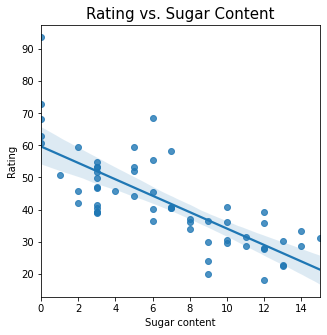

In [18]:
# Scatter plot with regression line for sugar

# Set the width and height of the figure
plt.figure(figsize=(5,5))

# Regression line
sns.regplot(x=X_train['sugars'], y=y_train)

# Add title
plt.title("Rating vs. Sugar Content", size=15)

# Add label for horizontal axis
plt.xlabel("Sugar content", size=10)

# Add label for vertical axis
plt.ylabel("Rating", size=10)

As we might expect, the sugar content is correlated with the overall rating.

Text(0, 0.5, 'Rating')

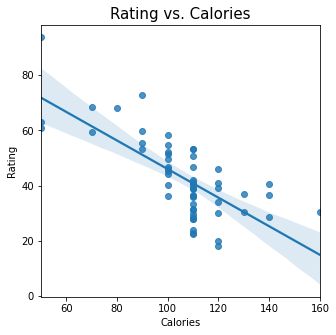

In [19]:
# Scatter plot with regression line for calories

# Set the width and height of the figure
plt.figure(figsize=(5,5))

# Regression line
sns.regplot(x=X_train['calories'], y=y_train)

# Add title
plt.title("Rating vs. Calories", size=15)

# Add label for horizontal axis
plt.xlabel("Calories", size=10)

# Add label for vertical axis
plt.ylabel("Rating", size=10)

The calories are also strongly correlated to the rating.

Let's check to see if 'shelf' is correlated with the nutritional rating. Stores may organize cereals in a way which correlates with nutritional content.

Text(0, 0.5, 'Rating')

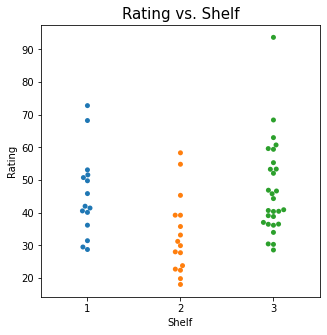

In [20]:
# Categorical scatter plot for shelf

# Set the width and height of the figure
plt.figure(figsize=(5,5))

# Categorical scatter plot
sns.swarmplot(x=X_train['shelf'], y=y_train)

# Add title
plt.title("Rating vs. Shelf", size=15)

# Add label for horizontal axis
plt.xlabel("Shelf", size=10)

# Add label for vertical axis
plt.ylabel("Rating", size=10)

There is a slight correlation. 

We can also see that there is an outlier point with a very high rating which we can remove.

In [21]:
# Remove the outlier point with a very high rating

X_train_drop_outlier = X_train.drop(data.index[3])
y_train_drop_outlier = y_train.drop(data.index[3])

To quantify the correlation of each numerical variable with rating, we can use a correlation matrix.

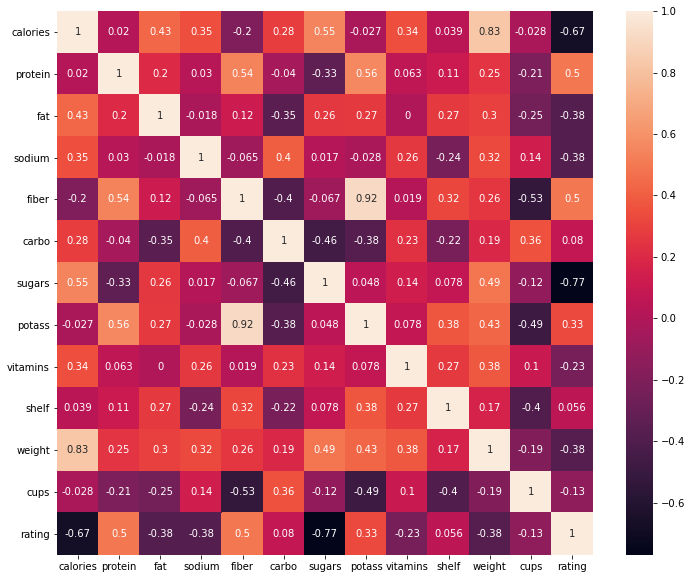

In [22]:
# Define data for correlation matrix
train_data = X_train_drop_outlier.join(y_train_drop_outlier)
correlation_matrix_data = train_data.drop([0, 1, 2, 3, 4, 5, 6, 7, 8], axis=1).corr()

# Plot of correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_data, annot=True)
plt.show()

We can also view the correlations as a bar chart.

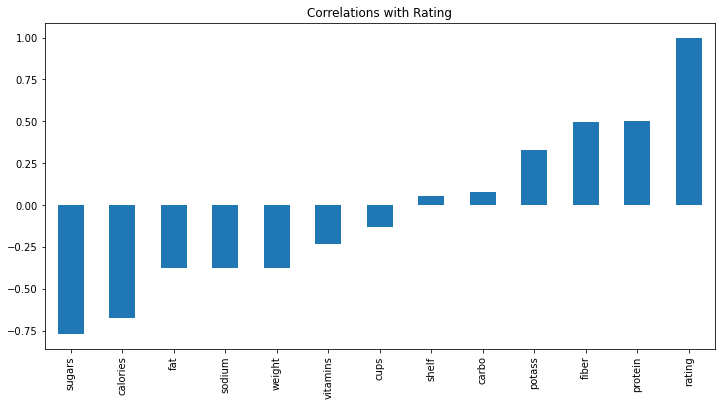

In [23]:
# Bar chart showing correlations with rating
plot_data = correlation_matrix_data["rating"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with Rating")
plt.show()

There is significant correlation between most of the variables and the rating. Let's include all variables with a correlation with an absolute value greater than 0.1. The correlation between rating and cups is -0.13, so we keep it. The correlation between rating and shelf is 0.056, and the correlation between rating and carbohydrates is 0.08, so we drop 'carbo' and 'shelf'.

In [24]:
# Drop 'carbo' and 'shelf' columns
X_train_drop_columns = X_train_drop_outlier.drop(['carbo','shelf'], axis=1)
X_test_drop_columns = X_test.drop(['carbo','shelf'], axis=1)

### Export Prepared Train and Test Data

In [25]:
# Export train data
X_train_drop_columns.to_csv('X_train.csv', index=False)
y_train_drop_outlier.to_csv('y_train.csv', index=False)

# Export test data
X_test_drop_columns.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Now with the data exported, it can be read into the Models notebook where I will try out different models.